# Feature Extraction 1 (with using librosa)

https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d

<hr>

The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

## Loading an audio and Show the data
<hr>

### Loading an audio

In [43]:
from librosa.display import specshow

In [19]:
import librosa
filename = librosa.util.example_audio_file()
audio_path = 'D:/project/data/audio/Hafferia fortis_Sooty Antbird/XC10508.mp3'
# x, sr = librosa.load(filename)
# print(type(x), type(sr))

In [20]:
audio_path

'D:/project/data/audio/Hafferia fortis_Sooty Antbird/XC10508.mp3'

In [24]:
x, sr = librosa.load(audio_path, offset=20, duration=5) # loads an audio file and decodes into 1-D array
print(type(x), type(sr)) # x is time series, and sr is sampling rate of x
# default of sr is 22kHz

<class 'numpy.ndarray'> <class 'int'>


In [25]:
# override sr
librosa.load(audio_path, sr=44100)

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)

In [26]:
# disable sr
librosa.load(audio_path, sr=None)

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)

### Playing an audio

In [29]:
import IPython.display as ipd
ipd.Audio(audio_path)

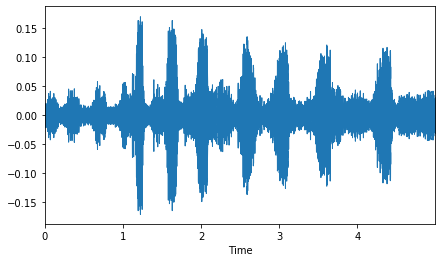

In [54]:
# display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
# librosa.display display in different formats (wave, spectogram, colormap)

plt.figure(figsize=(7, 4))
librosa.display.waveplot(x, sr=sr)

Spectogram shows different freq playing at particular time along with it amplitude. (amplitude and freqg are important for sound and it unique for each sound)
Waveform show waveform of amplitude vs time. (y is amplitude, x is time)

### Spectogram

Spectogram is visual representation of the spectrum of frequencies of sound
or other signals as they vary with time.

https://en.wikipedia.org/wiki/Spectral_density (Spectrum) <br>
https://www.youtube.com/watch?v=g1_wcbGUcDY (STFT)

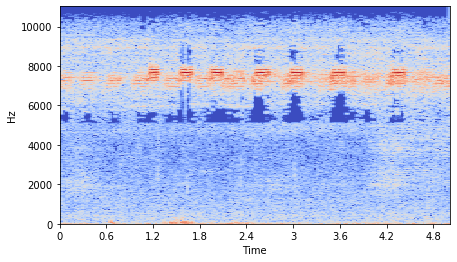

In [53]:
# display spectogram
X = librosa.stft(x) # Short Time Fourier Transform
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(7, 4))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

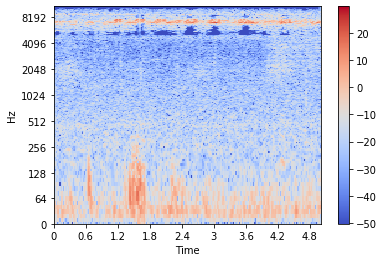

In [35]:
# log of frequencies
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [45]:
import numpy as np

In [50]:
sr

22050

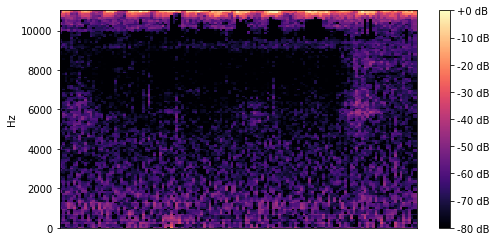

In [64]:

# Plot mel-spectrogram
N_FFT = 1024
HOP_SIZE = 860
N_MELS = 128
WIN_SIZE = 1024
WINDOW_TYPE = 'hann'
FEATURE = 'mel'
FMIN = 500

S = librosa.feature.melspectrogram(y = x, 
                                   sr = 44100, 
                                   n_fft = N_FFT, 
                                   hop_length=HOP_SIZE, 
                                   n_mels=N_MELS, 
                                   htk=True, 
                                   fmin=FMIN, 
                                   fmax=15000)
plt.figure(figsize=(8, 4))

specshow(librosa.power_to_db(S**2, ref=np.max),
                        fmin=FMIN, y_axis='linear')

plt.colorbar(format = '%+2.0f dB')
plt.show()

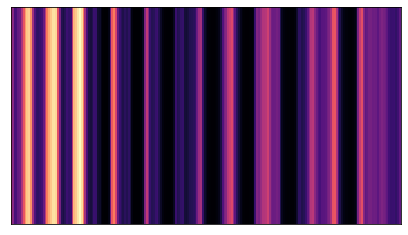

In [101]:
S, phase = librosa.magphase(librosa.stft(x))
flatness = librosa.feature.spectral_flatness(S=S, amin = 0.021)
plt.figure(figsize=(7, 4))
librosa.display.specshow(flatness)

In [90]:
flatness = librosa.feature.spectral_flatness(y=x, amin = 0.127)
plt.figure(figsize=(7, 4))
librosa.display.waveplot(flatness)

IndexError: index 1 is out of bounds for axis 0 with size 1

<Figure size 504x288 with 0 Axes>

<br>

## Feature Extraction
<hr> 

### Zero Crossing Rate

Zero Crossing rate คืออัตราการเข้าสู่การเปลี่ยนแปลงผ่านตามสัญญาณ อย่างเช่นอัตราการเปลี่ยนแปลงของสัญญาณจากบวกเป็นลบ (feature นี้มักใช้ใน speech recognition และ music information retreival)

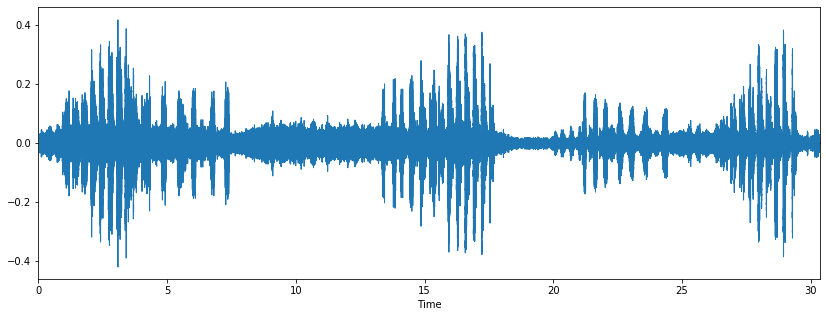

In [10]:
x, sr = librosa.load(audio_path)
# Plot the signal
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

### Zooming in

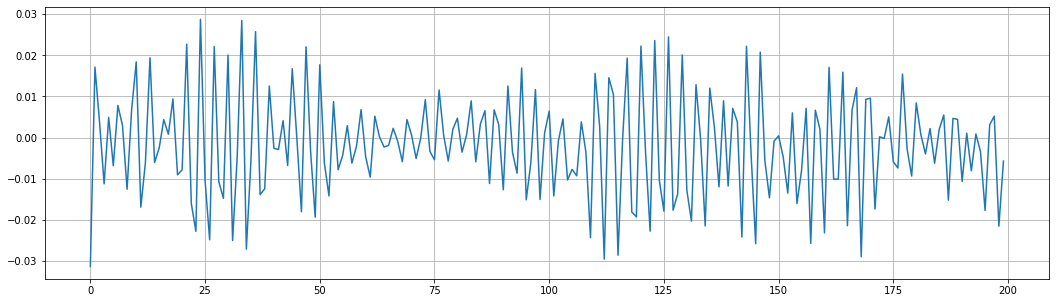

In [11]:
n0 = 1000
n1 = 1200
plt.figure(figsize=(18, 5))
plt.plot(x[n0 : n1]) # plot เฉยๆจะไม่เป็น time ให้แต่ถ้า waveplot จะระบุ time ตามจริง
plt.grid()

Zero Crossing คือดูจากจุดยอดว่าอันไหนนับเป็นเกิน 0.00 บ้าง <br>
ลองมาทำให้เล็กลงดู

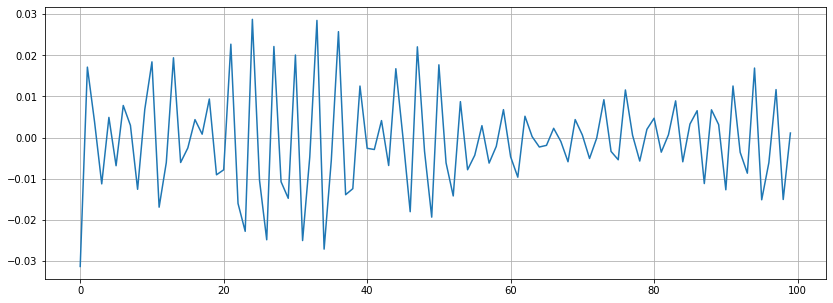

In [12]:
n0 = 1000
n1 = 1100
plt.figure(figsize=(14, 5))
plt.plot(x[n0 : n1])
plt.grid()

In [13]:
# calculate zero crossing
zeros_crossings = librosa.zero_crossings(x[n0 : n1], pad=False)
print(sum(zeros_crossings))

65


In [14]:
print(zeros_crossings[:5], zeros_crossings.shape)

[False  True False  True  True] (100,)


### Spectral Centroid

ระบุว่าจุดศูนกลางมวลของเสียงมันกระจุกอยู่ตงไหน และมันยังคำนวนออกมาเป็นค่าเฉลี่ยถ่วงน้ำหนักของความถี่ ที่มีอยู่ในเสียง.

In [15]:
from librosa.feature import spectral_centroid
from sklearn.preprocessing import minmax_scale

spectral_centroids = spectral_centroid(x, sr=sr)[0] # use to calculate the spectral
                            # centroid for each frame
spectral_centroids.shape

(1308,)

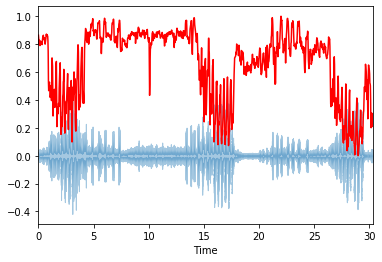

In [16]:
# compute the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames) # convert frame to time.time[i] == frame[i]

# Normailising the spectral centroid for visualisation
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

# Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), c='r') # ถ้าไม่ normalize จะแทบมองไม่ได้

บางครั้งเมื่อเรา plot spectral centroid มันจะคล้ายกับ zero crossing rate ในตอนที่มันเริ่มเสียง เพราะว่าความเงียบก่อนจะมีเสียงขึ้นในตอนแรกนั้น มีความกว้างของเสียงที่น้อยมาก เลยทำให้พวกความถี่สูงมาทำให้มันเสียงเพี้ยนได้ง่ายๆ แต่เสียงนกมันก็สูงอยู่แล้ว บางครั้งตวามเงียบที่เข้ามาแทรก ก็ไม่อาจแยกเราออกจากกันได้

### Spectral Rolloff
คือความถี่ที่อยู่ต่ำกว่าที่เป็นปกติมั๊ง เช่นเสียงคนที่เบาลงจากเดิมเหลือ 85% หมายความว่าอาจจะ <br>
กำลังโกหกอยู่

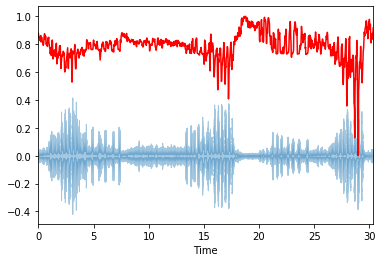

In [17]:
# .spectral_rolloff is used to calculate rolloff for a given frame.
spectral_rolloffs = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloffs), c='r')

### MFCC--Mel-Frequency Cepstral Coefficients

method to extract feature of audio signal and is used majorly whenever working on audio signals. <br>
the MFCCs of a signal are small set of features (10-20) which concisely describe overall shape of a spectral envelope.

(20, 1308)


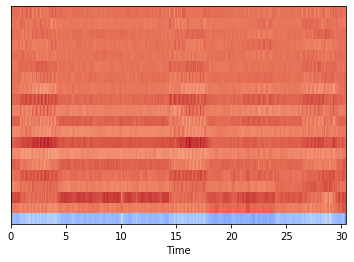

In [18]:
from librosa.feature import *
mfccs = mfcc(x, sr=sr) # คำนวณ mfcc ของสัญญาณ
print(mfccs.shape)

# Displaying the MFCCs
librosa.display.specshow(mfccs, sr=sr, x_axis='time')